# Statistical Physics Definitions

The field of statitical physics uses approaches of statistics and probability theory to address physical problems. It considers large populations and derives expressions for the ensemble (or the macrostate) of a system from the microscopic states in the system. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as fac

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Entropy


### Entropy Definition by Boltzmann
The term of entropy becomes very important in that context. It measures the number of different ways a system can be rearranged to yield the same macrostate. It is, thus, an indicator for the microscopic degeneracy of a macrostate. In this context the definition of entropy by **Boltzmann** is well known, i.e.,

\begin{equation}
S=k_\mathrm{B} \ln(W)
\end{equation}

where $W$ is the number of microstates corresponding to a system's macrostate with and energy $E$. Here $k_\mathrm{B}=1.38064852 × 10^{-23} {\rm m^2\, kg\, s^{-2}\, K^{-1}}$ is the Boltzmann constant. Below are two examples of how to use the formula for the calculation of the entropy.



<div class="alert alert-info">
    
**Example: Entropy of an N letter word**


![letters](img/letters.png)    

Consider the number of states $W$ of a word with $N$ letters of $M$ different characters. The letter can be arranged in 
    
\begin{equation}
W=M^N
\end{equation}
    
different ways such that the entropy is given by

\begin{equation}
S=N\, k_\mathrm{B} \ln(M) = k_{\rm B}\sum_{1}^{N} \ln(M)
\end{equation}
    
which just tells that entropy is an additive quantity.    
</div>



<div class="alert alert-info">
    
**Example: Arrangement of Molecules along a Chain**


![binding](img/binding.png)    
    
We consider a linear molecules (perhaps a DNA) that has $N$ binding sites for, e.g., proteins. $N_\mathrm{p}$ sites are occupied with a protein where the binding energy is equal for each site. The number of different ways in which the $N_\mathrm{p}$ proteins can be arranged on the $N$ sites is given by the binomial coefficient 
    
\begin{equation}
W(N_\mathrm{p};N)=\frac{N!}{N_\mathrm{p}!(N-N_\mathrm{p})!}.
\end{equation}
    
Therefore, the entropy is given by
    
\begin{equation}
S=k_\mathrm{B} \ln\left ( \frac{N!}{N_\mathrm{p}!(N-N_\mathrm{p})!}\right )
\end{equation}

which can be further simplified using the identity

\begin{equation}
\ln(N!)=\sum_{n=1}^{N}\ln(n)
\end{equation}
    
and the *Stirling approximation*

\begin{equation}
\sum_{n=1}^{N}\ln(n)\approx \int_1^{N}\ln(x)\,\mathrm{d}x\approx N\ln(N)-N.
\end{equation}
    
This, finally, leads to 
    
\begin{equation}
S=-k_\mathrm{B} N [c \ln(c)+(1-c)\ln(1-c)]
\end{equation}
    
with $c=N_\mathrm{p}/N$ being the mean occupation of each site or the probability to find a state occupied.    
    
    
</div>

Below you just find some Python code calculating the entropy as a function of "concentration" using the Stirling approximation and the original formula. You also recognize there, that the Stirling formula is not yet very good, since $N=100$.

In [6]:
epsilon=1e-3
c=np.linspace(epsilon,1-epsilon,100);N=100
Np=np.arange(1,N)

def S(x):
    return(np.log(fac(N)/(fac(x)*fac(N-x))))


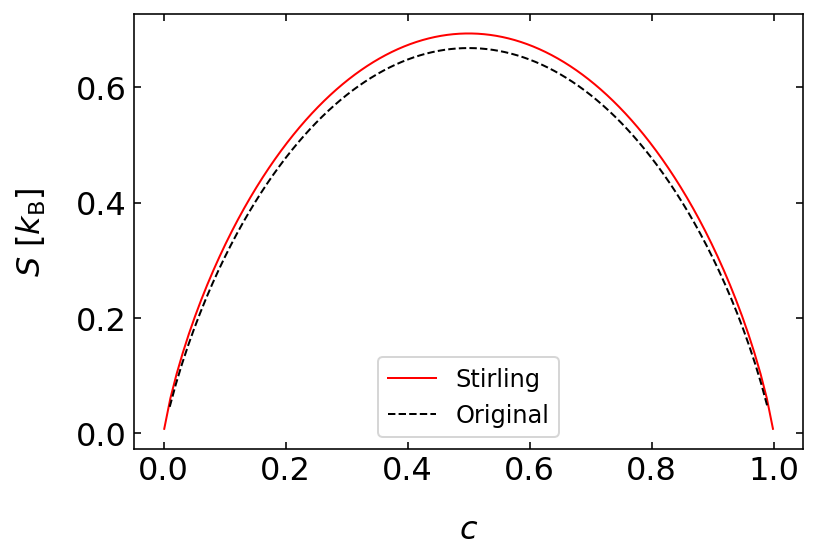

In [5]:
plt.plot(c,-(c*np.log(c)+(1-c)*np.log(1-c)),'r-',label="Stirling")
plt.plot(Np/N,S(Np)/N,'k--',label="Original")
plt.xlabel("$c$")
plt.ylabel(r"$S$ [$k_\mathrm{B}$]")
plt.legend()
plt.show()

### Shannon Entropy

A different access to entropy comes from the field of information theory and has been divised by Claude Shannon. Information theory is trying to mathematically assess the information content of measurement facing uncertainty. It will turn out further below that this alternative description results in the Boltzmann distribution and effectively amounts to making a best guess about the probability distribution given some limited knowledge about the system such as the average energy.

The Shannon entropy is defined by

\begin{equation}
S\left(p_{1}, p_{2}, \ldots, p_{N}\right)=S\left(\left\{p_{i}\right\}\right)=-\sum_{i=1}^{N} p_{i} \ln p_{i}
\end{equation}

and relates to its thermodynamic version, the Gibbs entropy

\begin{equation}
S\left(\left\{p_{i}\right\}\right)=-k_B\sum_{i=1}^{N} p_{i} \ln p_{i}
\end{equation}

where the $p_i$ is  the probability of the $i$th microstate (or outcome). The example below, will show that if only the normalization of the probability is known, maximization of the Shannon entropy will directly lead to an equal probabiliyt of events (equal distribution). Later, we see that similar calculations can be done to yields the Boltzmann distribution.

<div class="alert alert-info">
    
**Example: Equal Distribution **
    
    
To figure out that the Shannon entropy is indeed delivering some useful measure, we will have a look at a measurement which has $N$ outcomes (e.g. rolling a dice). We of course know that in this case all number of the dice have equal probability, but we can test this by maximizing the Shannon entropy as required by our thermodynamic considerations earlier.

To do so, we use the technique of Lagrangian multipliers, which allows us to set a constraint, while maximizing the entropy. This contraint is for this example, that 

\begin{equation}
\sum_{i}^{N} p_{i}=1
\end{equation}

i.e. that the probability is normalized to 1. With this constraint we maximize the entropy by adding an additional term with the contrains multilied by the Lagrangien multiplier $\lambda$

\begin{equation}
S^{\prime}=-\sum_{i} p_{i} \ln p_{i}-\lambda\left(\sum_{i} p_{i}-1\right)
\end{equation}

We see, that if the probability is normalized to 1, we do not change the entropy. Our procedure is to find that set of probabilities $p_i$ which maximize this augmented entropy function.

The derivative of the augmented entropy with respect to $\lambda$ yields the normalization condition, i.e. 

\begin{equation}
\frac{\partial S^{\prime}}{\partial \lambda}=0=-\left(\sum_{i} p_{i}-1\right)
\end{equation}

Differentiation with respect to the probabilities yields

\begin{equation}
\frac{\partial S^{\prime}}{\partial p_{i}}=0=-\ln p_{i}-1-\lambda
\end{equation}

which directly gives

\begin{equation}
p_{i}=\mathrm{e}^{-1-\lambda}
\end{equation}

Together with the normalization condition we therefore obtain

\begin{equation}
\sum_{i=1}^{N} \mathrm{e}^{-1-\lambda}=1
\end{equation}

and since the exponent does not depend on $i$ we find

\begin{equation}
\mathrm{e}^{-1-\lambda}=\frac{1}{N}
\end{equation}

or 

\begin{equation}
p_{i}=\frac{1}{N}
\end{equation}

which is the expected equal probability of finding one of the $N$ outcomes.
</div>

## Boltzmann Distribution

Our previous consideration of the state functions has shown, that thermal equibrium is associated with a minimum in free energy. As the free energy consists of internal energy $U$ (or enthalpy $H$) and an entropic term ($-TS$), we may understand this minimization as a competition between the minimization of the internal energy and a maximization of the entropy (since it is $-TS$). The figure below illustrates this competition for a gas in the gravity field. 



![entropy](img/entropy_comp.png)

The internal energy minimization yields just a condensed layer at the bottom of the container, while the entropy maximization will try to spread the particles evenly (middle picture). The compromise of both at finite temperature is given by the **barometric height formula**, i.e.,

\begin{equation}
p(z)=p_0\exp\left ( -\frac{m g z}{k_\mathrm{B} T}\right ),
\end{equation}

where $p(z)$ is the probability to find a particle at height $z$, $m$ is the mass of a particle, $g$ is the gravitational acceleration and $p_0$ is a normalization constant. The result actually gives a hint at some very fundamental distribution, which always provides the free energy minimum in thermal equilibirum. This distribution is the Boltzmann distribution.


The Boltzmann distribution is an approach of statistical physics to describe a thermodynamic system in equilibrium. The idea is hereby to deliver probability distributions for the probability of all different microstates. Key distinguishing feature of different microstates is their energy $E_i$ (that was so far neglected in the examples above), where $i$ indicates the $i$th microstate.

The Boltzmann distribution tells us precisely the probability of finding a given microstate with energy $E_i$: If a particle is in equilibrium with its environment then the probability of finding the particle in state $i$ with energy $E_i$ is

\begin{equation}
p(E_i)=\frac{1}{Z}\exp\left ( -\frac{E_i}{k_\mathrm{B} T}\right ).
\end{equation}

The normalization factor $1/Z$ contains the so-called partition function $Z$:

\begin{equation}
Z=\sum_{i}\exp\left ( -\frac{E_i}{k_\mathrm{B} T}\right )={\rm const}.
\end{equation}

It ensures that the total probablity to find a system in any of the states is 

\begin{equation}
\sum_i p(E_i)=1.
\end{equation}

### Mean Energy

The Boltzmann distribution is useful to calculate also expectation values, for example, of the total energy of the system (the mean energy $\langle E\rangle$).

The mean is defined by:
\begin{equation}
\langle E \rangle=\frac{1}{Z}\sum_{i=1}^{N}E_{i}\exp\left ( -\frac{E_i}{k_\mathrm{B} T}\right).
\end{equation}

Abbrevating $\beta=(k_\mathrm{B} T)^1$ we find

\begin{equation}
\langle E \rangle=\frac{1}{Z}\sum_{i=1}^{N}- \frac{\partial }{\partial \beta}\exp\left ( -\beta E_i\right),
\end{equation}

where the sum is nothing else than the derivative of the partition function

\begin{equation}
\langle E \rangle=-\frac{1}{Z} \frac{\partial }{\partial \beta}Z
\end{equation}

or just

\begin{equation}
\langle E \rangle=-\frac{\partial }{\partial \beta}\ln(Z).
\end{equation}


### Free energy

Using the Gibbs entropy $S=-k_B\sum_{i=1}^{N} p_{i} \ln p_{i}$ to find a relation between the free energy $F$ (or $G$) and the partition function. Inserting the probability 
$p_i=Z^{1}\exp(-\beta E_i)$ and doing some transformations yields 

\begin{equation}
S=k_B (\ln(Z)+\beta <E>)
\end{equation}
    
Using 
    
\begin{equation}
F=U-TS
\end{equation}
    
for the free energy, we can insert the above result for the entropy and obtain

\begin{equation}
F=-k_\mathrm{B} T \ln(Z).
\end{equation}

(or $G$ in the same way)    
    
Note that this is the total energy and not the mean energy (internal, enthalpy or free energy) of the states in the system. The partition function thus allows us to calculate the free energy.


### Deriving the Boltzmann Distribution

There are a number of ways to derive the Boltzmann distribution. We will have a quick look at a classical derivation of the Boltzmann distribution for a closed system, e.g. a system which is in contact with a reservoir as depicted below.

![Test](img/entropy_calc.png)

System (index $S$) and reservoir (index $R$) have total energy $E_{\rm tot}=E_{\rm R}+E_{\rm S}$. We assert now, that the probability to find the system in a specific microstate $p(E_s^i)$ with the energy $E_s^i$ is directly proportional to the number of states available to the reservoir, when the system is in that state. The ratio of the probability of two states is then equal to the ratio of the number of states of the reservoir, i.e.

\begin{equation}
\frac{p(E_s^{(1)})}{p(E_s^{(2)}}=\frac{W_{\rm R}(E_{\rm tot}-E_{\rm S}^{(1)})}{W_{\rm R}(E_{\rm tot}-E_{\rm S}^{(2)})}
\end{equation}

Here, $W_{\rm R}(E_{\rm tot}-E_{\rm S}^{(1)})$ is the number of states available to the reservoir, when the system is having the energy $E_{\rm S}^{1}$.

We can now rewrite the above equation in term of the entropy using $W=\exp(S/k_B)$ such that 

\begin{equation}
\frac{W_{\rm R}(E_{\rm tot}-E_{\rm S}^{(1)})}{W_{\rm R}(E_{\rm tot}-E_{\rm S}^{(2)})}=\frac{\exp(S_{\rm R}(E_{\rm tot}-E_{\rm S}^{(1)})/k_B)}{\exp(S_{\rm R}(E_{\rm tot}-E_{\rm S}^{(2)})/k_B)}
\end{equation}

We may now expand the entropy to first order

\begin{equation}
S_{\rm R}(E_{\rm tot}-E_{\rm S})\approx S_{\rm R}(E_{\rm tot})-\frac{\partial S_{\rm R}}{\partial E}E_{\rm S}
\end{equation}

considering that $E_{\rm S}$ is only a very tiny as compared to the total energy of the reservoir. Using the thermodynamic identity that

\begin{equation}
\frac{\partial S_{\rm R}}{\partial E}|_{V,N}=\frac{1}{T}
\end{equation}

we finally find

\begin{equation}
\frac{p(E_s^{(1)})}{p(E_s^{(2)})}=\frac{\exp(-E_{\rm S}^{(1)}/k_BT)}{\exp(-E_{\rm S}^{(2)}/k_BT)}
\end{equation}

which corresponds to the ratio of two Boltzmann distributions

\begin{equation}
p(E_{\rm S}^{(i)})=\frac{1}{Z}\exp\left (- \frac{E_{\rm S}^{(i)}}{k_B T}\right )
\end{equation}


where $Z$ is the previously mentioned normalization factor, which is called *partition function*.

<div class="alert alert-info">
    
**Example: Boltzmann Distribution is the Maximum Entropy Distribution in Which the Average Energy is Prescribed as a Constraint **
    
We can also obtain the Boltzmann distribution from the Shannon entropy by contraining the Shannon entropy. With only the normalization as a constraint in entropy maximization, we obtained equal likely microsates. If we now constrain the mean energy $\langle E\rangle$ of the system we obtain a distribution which maximizes the entropy under this condition. The mean energy is given by
    
\begin{equation}      
\langle E\rangle=\sum_{i} E_{i} p_{i}
\end{equation}    
    
such that we can add another constraint to our augmented entropy. We now have a Lagragian multilier $\lambda$ for the normalization of the probability and a second one $\beta$ which is multilolied by the energy constraint.
    
\begin{equation}    
S^{\prime}=-\sum_{i} p_{i} \ln p_{i}-\lambda\left(\sum_{i} p_{i}-1\right)-\beta\left(\sum_{i} p_{i} E_{i}-\langle E\rangle\right)    
\end{equation}
    
Taking the derivative 
    
\begin{equation}
\frac{\partial S_{\prime}}{\partial p_{i}}=0=-\ln p_{i}-1-\lambda-\beta E_i
\end{equation}
    
results in     
    
\begin{equation}     
p_{i}=\mathrm{e}^{-1-\lambda-\beta E_{i}}
\end{equation} 
    
and together with the normalization condition $\sum p_i=1$ finally   
    
\begin{equation}    
\mathrm{e}^{-1-\lambda}=\frac{1}{\sum_{i} \mathrm{e}^{-\beta E_{i}}}
\end{equation}    

where we already recognize that we can replace the prefactor $\mathrm{e}^{-1-\lambda}$ by $1/Z$ with $Z$ being the partition function
    
    
\begin{equation}     
Z=\sum_{i} \mathrm{e}^{-\beta E_{l}}
\end{equation}    

Overall this therefore leads to the Boltzmann distribution     
        
\begin{equation} 
p_{i}=\frac{\mathrm{e}^{-\beta E_{i}}}{\sum_{i} \mathrm{e}^{-\beta E_{i}}}
\end{equation}    
    
which is quite interesting. We have just fixed the mean energy of the system and maximized the entropy. The Boltzmann distribution is therefore the probability distribution which maximizes the entropy under as little as possible additional information (just the mean energy).     
    
The only thing that is missing in the above formula is an expression for the value of $\beta$, the Lagrange multiplier. This can be obtained when knowning the mean energy. In thermal euilibrium, this mean energy can be obtained from the equipartition theorem.    
    
    
</div>

## When a Macrostate is a Microstate

In practice, we are often interested in the likelihood that
the system a state that is described by some macroscopic parameter $X$ that we can measure. For example, for a DNA molecule inside a cell, an interesting quantity, which can be measured using fluorescent markers, is the distance R between two sites on the DNA chain. Repeated measurements of $R$ can to construct the probability distribution p(R).

In general, the probability of the macrostate $X$ is given by the sum of probabilities of all the microstates of the system that adopt the specified value $X$,

\begin{equation} 
p(X)=\sum_{i_{X}} p_{i}=\sum_{i_{X}} \frac{1}{Z} \mathrm{e}^{-\beta E_{i}}
\end{equation}

For the DNA example, the sum in the above equation would run over only those microstates $i_X$ that have the prescribed distance between the two labeled sites on the polymer, e.g. $X=R$.
Using the basic relation between the partition function and the free energy, $G = −k_BT \ln(Z)$, we can express the probability of the macrostate X as

\begin{equation}
p(X)=\frac{1}{Z} \mathrm{e}^{-\beta G(X)}
\end{equation}

where

\begin{equation}
G(X)=-k_{\mathrm{B}} T \ln \left(\sum_{i_{X}} \mathrm{e}^{-\beta E_{i}}\right)
\end{equation}

is the free energy of the macrostate $X$. Note that the formula for $p(X)$ is identical to the Boltzmann formula for the probability of a microstate, with the energy of the microstate replaced by the free energy of the macrostate. Note that the sum on the right side of the last equation is not the partition function $Z$ but that of the subensemble of microstates fulfilling the condition X, i.e. $Z_X$. Similarly, when writing down the states and weights for the macrostates $X$, the energy is replaced by the free energy, as shown in in the figure below. In this sense, one person’s macrostate is truly another person’s microstate.


![micro_macro](img/micro_macro.png)

## Equipartition

In the previous section, we showed how the probability distribution for a system with average energy $\langle E \rangle$ could be guessed by using the principle of maximum entropy. However, to finish that calculation, we need to determine the meaning and significance of the Lagrange multiplier $\beta$.

To obtain the lagrange parameter we just consider one degree of freedom for a monoatomic gas. This degree of freedom is the kinetic energy of one atom along the x-direction, which is given by

\begin{equation}
E=\frac{p_{X}^{2}}{2 m}
\end{equation}


According to the Boltzmann distribution, the probability to find an atom with a certain momentum is given by

\begin{equation}
P\left(p_{x}\right)=\frac{\mathrm{e}^{-\beta\left(p_{x}^{2} / 2 m\right)}}{\sum_{\text {states }} \mathrm{e}^{-\beta\left(p_{x}^{2} / 2 m\right)}}
\end{equation}

We can thus calculate the mean energy by summing up (or integrating when going to continuous states) over alls possible momenta

\begin{equation}
\sum_{\text {states }} \rightarrow \int_{-\infty}^{\infty} \mathrm{d} p_{x}
\end{equation}


This yields

\begin{equation}
\int_{-\infty}^{\infty} \mathrm{e}^{-\beta p_{x}^{2} / 2 m} \mathrm{~d} p_{x}=\sqrt{\frac{2 m \pi}{\beta}}
\end{equation}

To obtain the value of $\beta$ we now constrain the mean energy to the value given by the equiparition principle

\begin{equation}
\langle E\rangle=\frac{1}{2} k_{\mathrm{B}} T
\end{equation}

This is the mean energy per degree of freedom. One can show that each degree of freedom, independent of the object (atom, colloid, parking car) is carrying this mean energy. It provides actually our measure of temperature.

Using the momentum to calculate the mean energy we write down 

\begin{equation}
\langle E\rangle=\frac{\int_{-\infty}^{\infty} \frac{p_{X}^{2}}{2 m} \mathrm{e}^{-\beta\left(p_{x}^{2} / 2 m\right)} \mathrm{d} p_{x}}{\sqrt{2 m \pi / \beta}}
\end{equation}

which can be slightly simplified 

\begin{equation}
\langle E\rangle=\frac{\alpha^{3 / 2}}{\beta \sqrt{\pi}}\left(-\frac{\partial}{\partial \alpha}\right) \int_{-\infty}^{\infty} \mathrm{e}^{-\alpha p_{x}^{2}} \mathrm{~d} p_{x}
\end{equation}

and calculated via some tricks valid for integrals over Gaussian functions. This finally leads us to the result that the value of the Lagrangian multiplier must be

\begin{equation}
\beta=\frac{1}{k_{\mathrm{B}} T}
\end{equation}



Equipartition is useful in many ways. One of them is the field of force measurements using optical tweezers.

![tweezers](img/tweezers.png)